In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dus14 = pd.read_csv('Dus2014.csv')
dus18 = pd.read_csv('Dus2018.csv')

In [7]:
d14s = dus14[['lytis', 'amzius', 'issilavinimas','bdu_spalio','profesija']]

In [9]:
d18s = dus18[['lytis', 'amzius', 'issilavinimas','bdu_spalio','profesija']]

In [30]:
# suraskite ir išspausdinkite vidutinius vyrų bei moterų atlyginimus (spalio)
# 2014 ir 2018 metams.

moterys_2014 = d14s[d14s["lytis"]=="F"] 
vyrai_2014 = d14s[d14s["lytis"]=="M"]  

VidMoteru_2014 = moterys_2014['bdu_spalio'].mean()
VidVyru_2014 = vyrai_2014['bdu_spalio'].mean()
print("2014 Moterų : ", VidMoteru_2014/3.4528, "2014 Vyrų : ", VidVyru_2014/3.4528)

moterys_2018 = d18s[d18s["lytis"]=="F"] 
vyrai_2018 = d18s[d18s["lytis"]=="M"]  

VidMoteru_2018 = moterys_2018['bdu_spalio'].mean()
VidVyru_2018 = vyrai_2018['bdu_spalio'].mean()
print("2018 Moterų : ", VidMoteru_2018, "2018 Vyrų ", VidVyru_2018)

2014 Moterų :  607.4431355450901 2014 Vyrų :  762.7704309291468
2018 Moterų :  832.1469450889405 2018 Vyrų  1014.4962626801922


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
#pridedam nauja stulpeli

bdu_spalio = d14s['bdu_spalio'].values
bdu_eurais = bdu_spalio/3.4528
d14s['bdu_eur'] = bdu_eurais
d14s.head(10)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [35]:
d14s['bdu_eur'] = d14s['bdu_spalio']/3.4528

In [36]:
#.query()- rezultatas yra lentele

d14s.query('lytis == "M"') # stulpeluje "lytis" ieskome reiksmiu "M". SVARBU- Kabutes tokios kaip pvz.

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [38]:
d14s.query('lytis == "M" and issilavinimas == "G3"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [41]:
# kodas, kuris atrenka tik tuos respondentus su nurodomu issilavinimu

edu = input("Iveskite issilavinimo koda (G1, G2, G3, G4)")
ats = d14s.query('issilavinimas == @edu') # pries kitamaji reikia rasysi @. @ nurodo, kad prie jo yra kintamasis aprasytas kode pries Query israiska
ats.head(3)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
1,F,20-29,G2,6.00,334,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720


In [60]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']

g1_issilavinimas = d14s.query('issilavinimas == "G1"') # pertekline eilute, kad paziureti kaip rasyti, kad tiktu visam edus
for kodas in edus:
    vidurkis = d14s.query('issilavinimas == @kodas')['bdu_eur'].mean() # 
    print(kodas, vidurkis)

G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [133]:
# destytojo sprendimo pvz:

edus = ['G1', 'G2', 'G3', 'G4']
for i in edus:
    g = d14s.query('issilavinimas == @i')['bdu_eur'].mean()
    print(i, g)

G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [63]:
# apply metodas 

def LTLtoEuro(litas): # funkcija pavercia litus i eurus
    euras = litas*3.45280
    return euras

d14s['Eurai is funkcijos'] = d14s['bdu_spalio'].apply(LTLtoEuro) 
# iki = zenklo, naujo stulpelio lenteleje pavadinimas i kuria irasysime nurodyta reiksme
# po = zenklo- paims is stulpelio bdu_spalio viena reiksme ir nues su ja i metoda LTLtoEur, kur pavers i eur bei irasys i nauja stulpeli
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur,Eurai is funkcijos
0,M,20-29,G4,6.00,261,1.737720,20.716800
1,F,20-29,G2,6.00,334,1.737720,20.716800
2,F,40-49,G4,6.00,221,1.737720,20.716800
3,F,30-39,G4,6.00,332,1.737720,20.716800
4,M,40-49,G2,11.33,962,3.281395,39.120224
5,M,30-39,G2,6.00,122,1.737720,20.716800


In [64]:
# panaikinam nereikalinga stulpeli

d14s.drop(columns = ['Eurai is funkcijos'], inplace=True)
d14s.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395


In [77]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė

def kokia_lytis(lytis):
    if lytis == "M":
        return "vyras"
    else:
        return "moteris"

d14s['Vyras ar moteris'] = d14s['lytis'].apply(kokia_lytis)
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu_eur,Vyras ar moteris
0,M,20-29,G4,6.00,261,1.737720,vyras
1,F,20-29,G2,6.00,334,1.737720,moteris
2,F,40-49,G4,6.00,221,1.737720,moteris
3,F,30-39,G4,6.00,332,1.737720,moteris
4,M,40-49,G2,11.33,962,3.281395,vyras
5,M,30-39,G2,6.00,122,1.737720,vyras


In [1]:
# alternatyvus sprendimus su for ciklus:
def zodzioKeitimas():
    lytys = []
    for x in dus14['lytis'].values:
        if x == 'M':
            lytys.append('Vyras')
        else:
            lytys.append('Moteris')
    return lytys
zodzioKeitimas()
d14s['Vyrai ir Moterys'] = zodzioKeitimas()
d14s.head(15)

NameError: name 'dus14' is not defined

In [83]:
# kai failo tkirtukai yra ne kableliai, o kitas simbolis

nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME']) # su sep= nuorodme koks faile skirtukas; parse_date pakeicia nurodyty stulpeliu formatus i standartini formata yy/mm/dd
nypd.head(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [85]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']}) # po parse_dates nurodome zodyna, kur DATA bus naujas stulpenis, op OCCUR Date ir OCCUR Time formatai bus paversti ir irasyti i DATA
nypd.head(2)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [106]:
# .dt modulis, veikia tik tada, jei stulpelis DataFrame yra datetime tipo
# skirrtas jeigu norime paiimti su laiku susijusius objektus

nypd_small = nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [107]:
nypd_small['DATA'].dt.month #month yra atributas, ka norime kad grazintu is datos stulpelio

0         8
1        11
2         2
3        10
4         8
         ..
21621    11
21622    12
21623     7
21624     9
21625     4
Name: DATA, Length: 21626, dtype: int32

In [211]:
nypd_small['MonthNr']= nypd_small['DATA'].dt.month
nypd_small['Hour']= nypd_small['DATA'].dt.hour
nypd_small['HR']= nypd_small['DATA'].dt.round('H').dt.hour # round('H')suapvalina valandos tikslumu
nypd_small['MthName']= nypd_small['DATA'].dt.month_name() #month_name() yra funkcija
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,Paros laikas,Metu laikas,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,naktis,vasara,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,diena,ruduo,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,vakaras,ziema,Vakaras,Žiema


In [135]:
#.value.count()

# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr

def paros_laikas(Hour):
    if Hour > 6 and Hour < 11:
         return "rytas"
    elif Hour >= 12 and Hour < 17:
         return "diena"
    elif Hour >= 18 and Hour < 22:
         return "vakaras"
    else: 
         return"naktis"
    
def metu_laikas(MonthNr):
    if MonthNr == 12 or MonthNr == 1 or MonthNr == 2:
         return "ziema"
    elif MonthNr >= 3 and MonthNr < 5:
         return "pavasaris"
    elif MonthNr >= 6 and MonthNr <= 8:
         return "vasara"
    else:
         return "ruduo"

nypd_small['Paros laikas'] = nypd_small['Hour'].apply(paros_laikas)
nypd_small['Metu laikas'] = nypd_small['MonthNr'].apply(metu_laikas)
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,Paros laikas,Metu laikas,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,naktis,vasara,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,diena,ruduo,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,vakaras,ziema,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,naktis,ruduo,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,vakaras,vasara,Vakaras,Vasara


In [128]:
# destytojo ideta lternatyva:

def para(x):
    if x >= 22 or x < 6:
        return 'Naktis'
    elif x >= 6 and x < 10:
        return 'Rytas'
    elif x >= 10 and x < 16:
        return 'Diena'
    else:
        return 'Vakaras'

def metai(x):
    if x in [12,1,2]:
        return 'Žiema'
    elif x in [3,4,5]:
        return 'Pavasaris'
    elif x in [6,7,8]:
        return 'Vasara'
    else:
        return 'Ruduo'

nypd_small['ParosL'] = nypd_small['Hour'].apply(para)
nypd_small['MetųL'] = nypd_small['MonthNr'].apply(metai)
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,Paros laikas,Metu laikas,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,naktis,vasara,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,diena,ruduo,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,vakaras,ziema,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,naktis,ruduo,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,vakaras,vasara,Vakaras,Vasara


In [130]:
# value_counts metodas
# suskaiciuoja kiek kuri reiksme pasikartoja
nypd_small['MthName'].value_counts() # parodo kiek kartu koks menuo paminetas

# atsakymo forma neiprasta: menesiai yra INDEX, skaiciai yra VALUES

MthName
July         2482
August       2462
June         2192
May          2037
September    2033
October      1851
December     1601
April        1578
November     1550
January      1411
March        1331
February     1098
Name: count, dtype: int64

In [137]:
# RUSIAVIMAS

nypd_small['MthName'].value_counts().sort_values(ascending = True) # (ascending = True)- rusiuoja Values stulpeli didejimo tvarka, (ascending = False)- rusiuoja mazejimo tvarka

MthName
February     1098
March        1331
January      1411
November     1550
April        1578
December     1601
October      1851
September    2033
May          2037
June         2192
August       2462
July         2482
Name: count, dtype: int64

In [139]:
nypd_small['MthName'].value_counts().sort_index(ascending = True) # sort_index(ascending = True)- rusiuoja Index stulpeli didejimo tvarka pagal abecele; False priesinagi.

MthName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

In [140]:
shootings = nypd_small['MthName'].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts, sep='\n')
# atskiriam i du atskirus sarasus

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


In [143]:
nypd_small['MonthNr'].value_counts().sort_index(ascending=True)

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

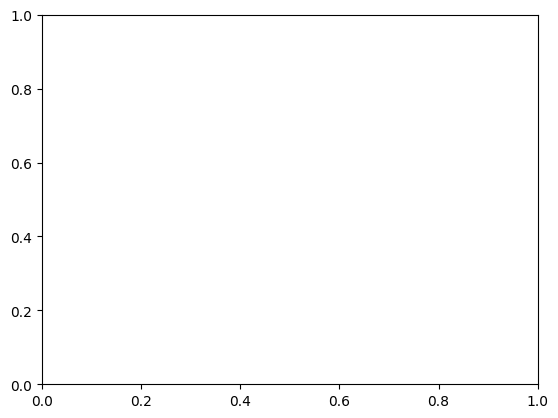

In [146]:
# plt.subplots():

langas, grafikas = plt.subplots() # langas- jo veikimo nesimato, jis iskvieciamas su nesaugiu kodu


plt.show()

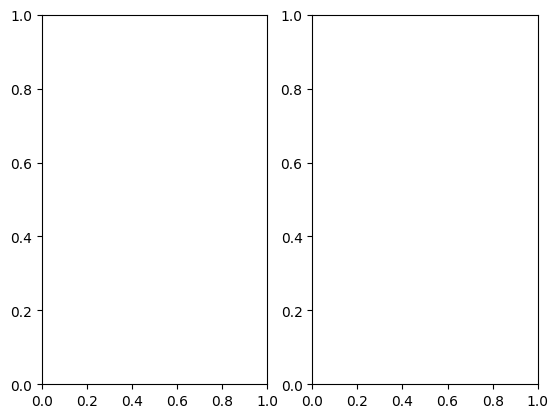

In [154]:
langas, grafikas = plt.subplots(1,2) # skliausteliuose galime nupdyti kiek taskiru langu reikia, pvz.:2. 2 yra eiluciu kiekis. Po kablelio skaicius nurodo kiek stulpeliu reikia.


plt.show()

AttributeError: 'tuple' object has no attribute 'figsize'

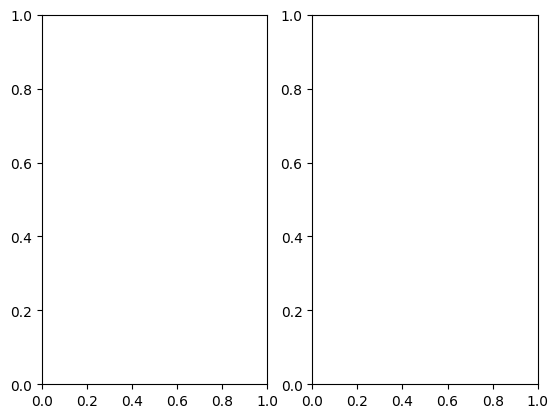

In [163]:
langas, grafikas = plt.subplots(1,2).figsize = [8,4.5] # figsize- keiciamas figuros dydis, [skaiciai] tai aukstis ir plotis


plt.show()

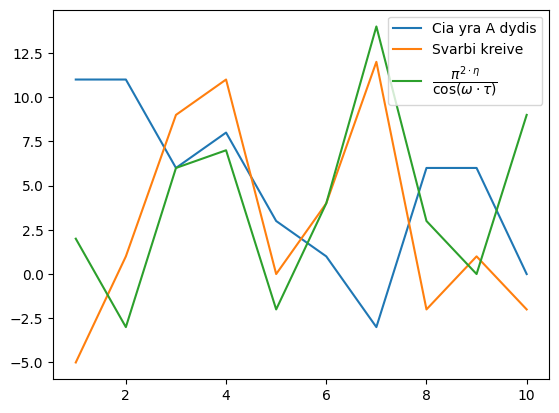

In [167]:
a = np.arange(1,11)
b = np.random.randint(-5, 15,10)
c = np.random.randint(-5, 15,10)
d = np.random.randint(-5, 15,10)
langas, grafikas = plt.subplots()
grafikas.plot(a,b, label='Cia yra A dydis') # 
grafikas.plot(a,c, label='Svarbi kreive')
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$')

grafikas.legend(loc='best') # best- parenka geriausiai tinkancia vieta legendai. Galimos pozicijos: 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'.


plt.show()

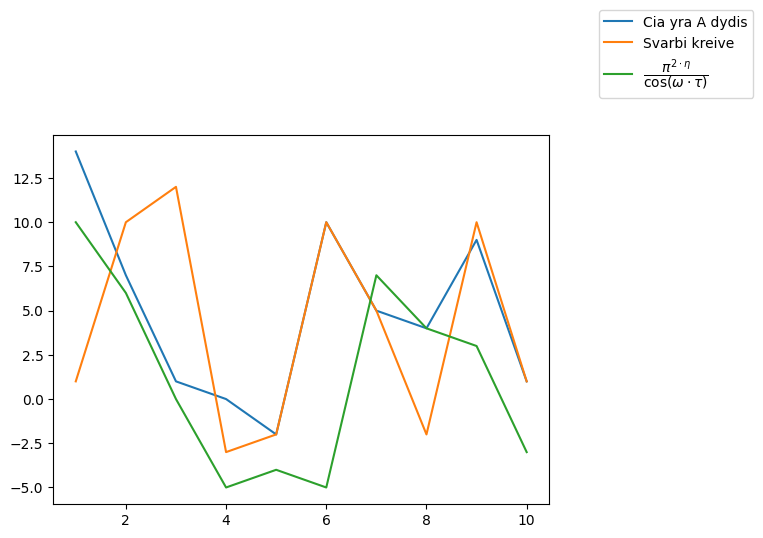

In [173]:
a = np.arange(1,11)
b = np.random.randint(-5, 15,10)
c = np.random.randint(-5, 15,10)
d = np.random.randint(-5, 15,10)
langas, grafikas = plt.subplots()
grafikas.plot(a,b, label='Cia yra A dydis') # 
grafikas.plot(a,c, label='Svarbi kreive')
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$')

grafikas.legend(loc=[1.1,1.1]) # [1.1,1.1] nurodome koordinates, kad legenda atsidurtu norimoje vietoje, pvz uz grafiko ribu.


plt.show()

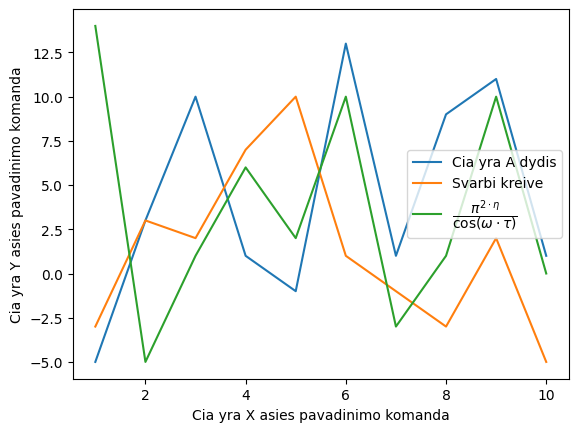

In [174]:
# asiu pavadinimai:

a = np.arange(1,11)
b = np.random.randint(-5, 15,10)
c = np.random.randint(-5, 15,10)
d = np.random.randint(-5, 15,10)
langas, grafikas = plt.subplots()
grafikas.plot(a,b, label='Cia yra A dydis') # 
grafikas.plot(a,c, label='Svarbi kreive')
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$')

grafikas.set_xlabel("Cia yra X asies pavadinimo komanda") # taip ivedam asies pavadinima
grafikas.set_ylabel("Cia yra Y asies pavadinimo komanda")

grafikas.legend(loc="best")


plt.show()

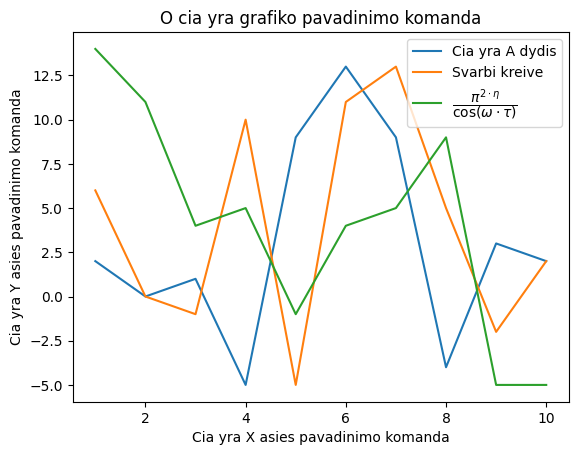

In [176]:
# lenteles pavadinimas:

a = np.arange(1,11)
b = np.random.randint(-5, 15,10)
c = np.random.randint(-5, 15,10)
d = np.random.randint(-5, 15,10)
langas, grafikas = plt.subplots()
grafikas.plot(a,b, label='Cia yra A dydis')
grafikas.plot(a,c, label='Svarbi kreive')
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$')

grafikas.set_xlabel("Cia yra X asies pavadinimo komanda")
grafikas.set_ylabel("Cia yra Y asies pavadinimo komanda")
grafikas.set_title("O cia yra grafiko pavadinimo komanda")

grafikas.legend(loc="best")


plt.show()

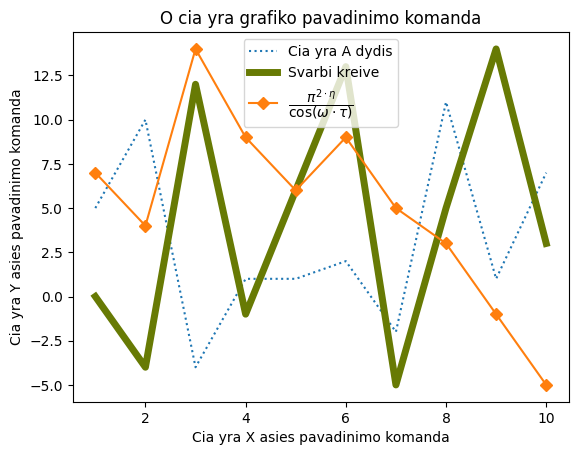

In [203]:
# liniju formato pakeitimas

a = np.arange(1,11)
b = np.random.randint(-5, 15,10)
c = np.random.randint(-5, 15,10)
d = np.random.randint(-5, 15,10)
langas, grafikas = plt.subplots()
grafikas.plot(a,b, label='Cia yra A dydis', linestyle=":")# linestyle- keicia grafiko liniju bruksnio formata
grafikas.plot(a,c, label='Svarbi kreive', linewidth=5, color= 'xkcd:olive green')# linewidth-  linijos plotis; color- slava pakeiciama. Spalvu sarasas, kurias galima nurodyti https://xkcd.com/color/rgb/, geriausia nurodyti spalvos koda ir bus maziau probl negu zodziais. Pavydyje nurodymo dviem zodziais pvz.
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker='D') # marker- kreives persilauzimo tasko simbolis, jie visi yra cia https://matplotlib.org/stable/api/markers_api.html

grafikas.set_xlabel("Cia yra X asies pavadinimo komanda")
grafikas.set_ylabel("Cia yra Y asies pavadinimo komanda")
grafikas.set_title("O cia yra grafiko pavadinimo komanda")

grafikas.legend(loc="best")

plt.show()

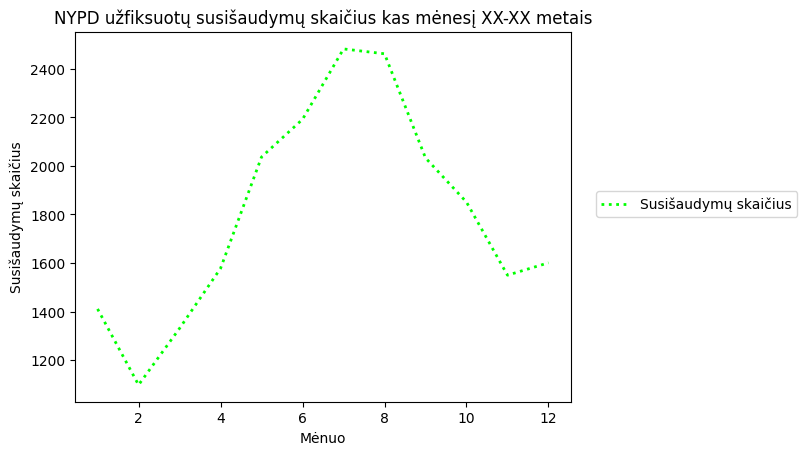

In [219]:
# turite nypd susišaudymų duomenis.
# nubraižykite vizualizaciją, naudodami ką tik pateiktą pavyzdį, 
# kad matytumėme, kurį monėsį yra daugiausiai, mažiausiai užfiksduotų
# susišaudymų
# sudėkite prasmingus ašių pavadinimus

A = nypd_small['MonthNr'].value_counts().sort_index(ascending=True)

# nypd_small['MthName'].value_counts().sort_values(ascending = True)
# nypd_small['MthName'].value_counts().sort_index(ascending = True)

months= A.index
shootings= A.values

langas, grafikas = plt.subplots()
grafikas.plot(months, shootings, label='Susišaudymų skaičius', linewidth=2, color= 'lime', linestyle=":")

grafikas.set_xlabel("Mėnuo")
grafikas.set_ylabel("Susišaudymų skaičius")
grafikas.set_title("NYPD užfiksuotų susišaudymų skaičius kas mėnesį XX-XX metais")

grafikas.legend(loc=[1.05,0.5])

plt.show()

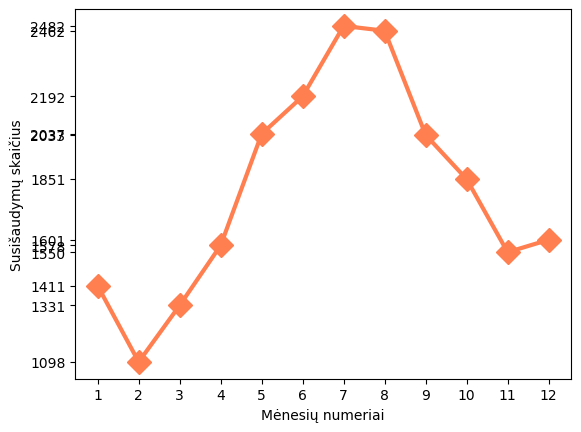

In [232]:
months_counts =  nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
months = months_counts.index
counts = months_counts.values

fig, ax = plt.subplots()
ax.plot(months, counts, lw=3, c='coral', marker= 'D', ms=12 )

ax.set_xticks(months) # padaro, kad butu mineti lenteleje menesiai
# kitas variantas x.set_xticks[1,7.5,10]

ax.set_yticks(counts) # padaro, kad butu visi susisaudymu skaiciai

ax.set_ylabel('Susišaudymų skaičius')
ax.set_xlabel('Mėnesių numeriai')

plt.show()

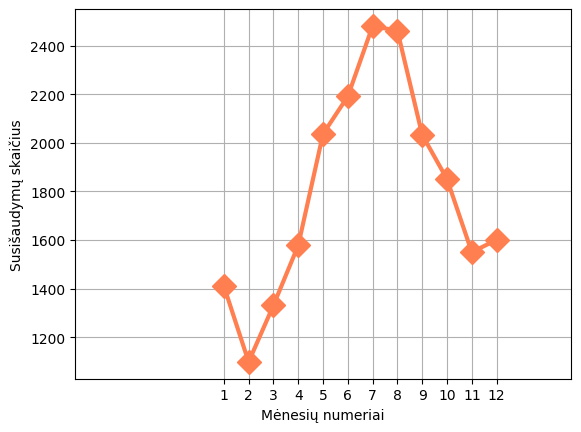

In [236]:
months_counts =  nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
months = months_counts.index
counts = months_counts.values

fig, ax = plt.subplots()# nusibraizome grafika
ax.plot(months, counts, lw=3, c='coral', marker= 'D', ms=12 )

ax.set_xticks(months) # asies norimu skaiciu palikimas
ax.set_xlim(-5,15) # x- asies ribu keitimas
ax.grid() # tinklelio uzdejimas


ax.set_ylabel('Susišaudymų skaičius')
ax.set_xlabel('Mėnesių numeriai')

plt.show()#nusibraizome grafika

      MthName  MonthNr  count
9     January        1   1411
11   February        2   1098
10      March        3   1331
7       April        4   1578
3         May        5   2037
2        June        6   2192
0        July        7   2482
1      August        8   2462
4   September        9   2033
5     October       10   1851
8    November       11   1550
6    December       12   1601


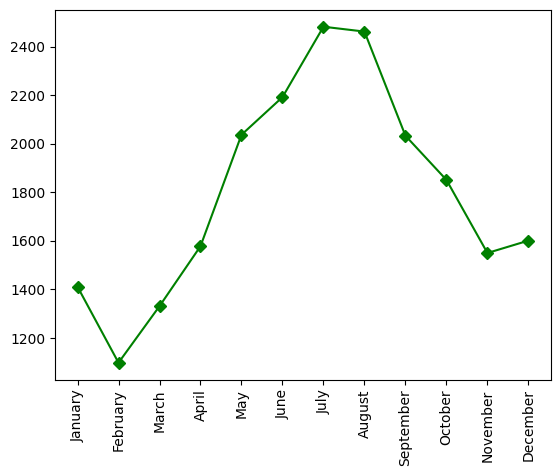

In [259]:
months = nypd_small[['MthName', 'MonthNr']].value_counts().reset_index().sort_values(by='MonthNr')
print(months)

fig, ax = plt.subplots()

mnames = months['MthName'].values
mnumbers = months['MonthNr']
counts = months['count'].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90) # pavercia menesiu pavadinimus grafike 90laipsniu kampu

plt.show()

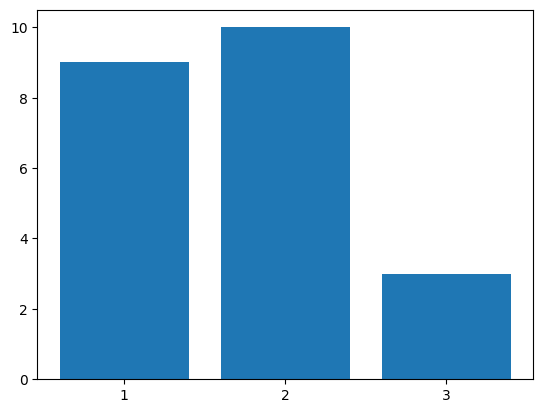

In [263]:
# bar grafikai (stulpeliniai grafikai)

a = np.arange(1,4)
b = np.random.randint(1,11,13)

fig, ax = plt.subplots()

ax.bar(a,b)
ax.set_xticks(a) # panaikina pusinius skaicius, nes ju dazniausiai nereikia

plt.show()

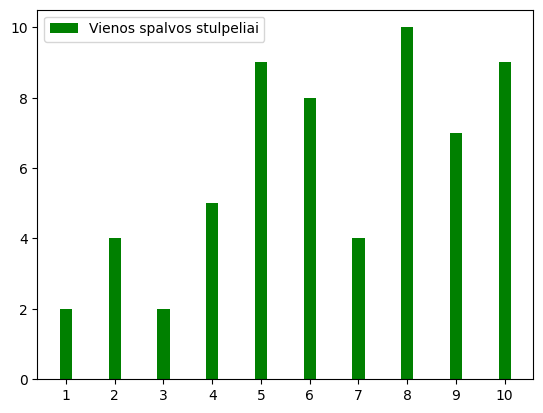

In [273]:
a = np.arange(1,11)
b = np.random.randint(1,11,10)
# color_list= ['green', 'red', 'blue', 'xkcd:deep purple'] - siai lentelei nenaudojamas

fig, ax = plt.subplots()

ax.bar(a,b, color= 'Green', width= 0.25, label = "Vienos spalvos stulpeliai")
ax.set_xticks(a) # panaikina pusinius skaicius, nes ju dazniausiai nereikia
ax.legend(loc='best')

plt.show()

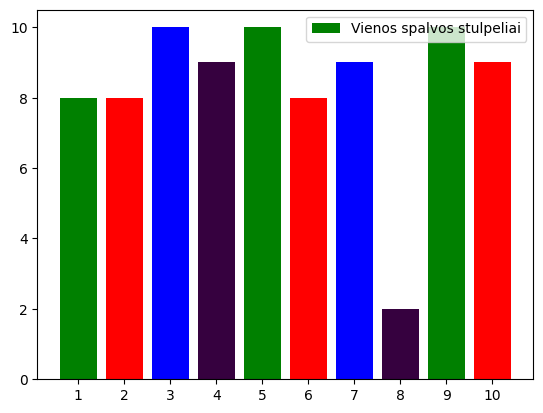

In [277]:
a = np.arange(1,11)
b = np.random.randint(1,11,10)
color_list= ['green', 'red', 'blue', 'xkcd:deep purple'] # ima kaip ciklas kiekviena is eiles stulpeli vis kita spalva

fig, ax = plt.subplots()

ax.bar(a,b, color= color_list, label = "Vienos spalvos stulpeliai")
ax.set_xticks(a)
ax.legend(loc='best') # rodo tik viena spalva, pacia pirma

plt.show()

In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\Dovydaiciai\Documents\Python mokymai\Python\Git\JupyterNotes


In [ ]:
# :imp -importavimui
# :sfig - vienam grafikui
# :fig - 1nm grafikui su daugiau kodo

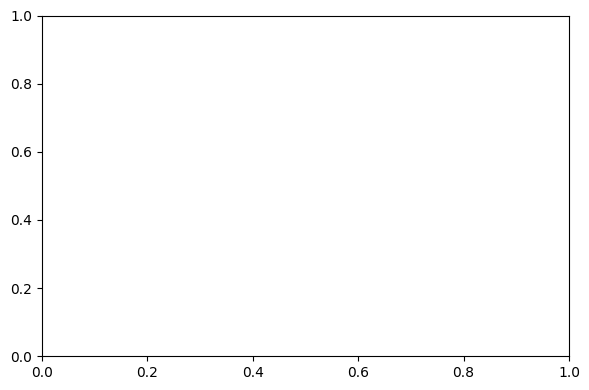

In [280]:
# :sfig - vienam grafikui
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

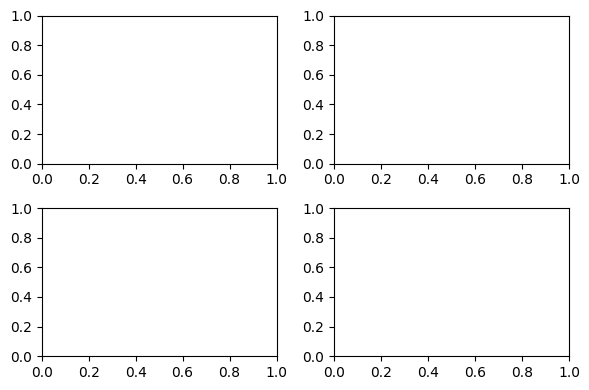

In [2]:
# :fig - 1nm grafikui su daugiau kodo
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(fwidth*1,fheight*1), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:


#ax1.legend(loc='best')
#ax2:
#plotting code:


#ax2.legend(loc='best')
#ax3:
#plotting code:


#ax3.legend(loc='best')
#ax4:
#plotting code:


#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

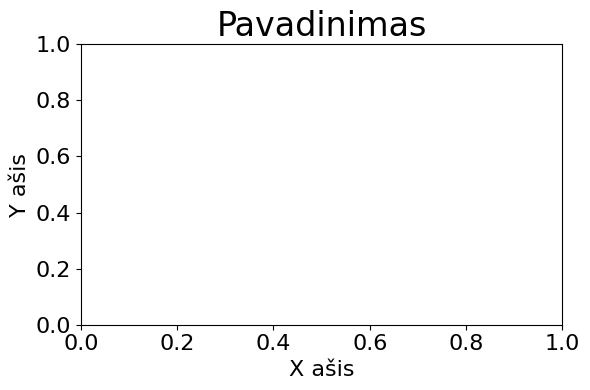

In [282]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()